In [139]:
# -*- coding: utf-8 -*-
# -*- name code: ernazar v0.1 -*-
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [140]:
im = Image.open('d:/AnacodaProgect/2019_januar/image/46402332815_df5b20704d_k.jpg')
width, height = im.size

In [135]:
text = 'Иргит В.'
fontsize = 100
position_h = 800
position_w = 800
font = ImageFont.truetype(r'd:/AnacodaProgect/2019_januar/image/font.ttf', fontsize)
img = Image.new('RGBA', (width, height), (0,0,0,0))
d = ImageDraw.Draw(img)

d.text((position_w-3,position_h-3), text, fill=(200,200,200), font = font)
d.text((position_w,position_h), text, fill=(78,86,86), font = font)


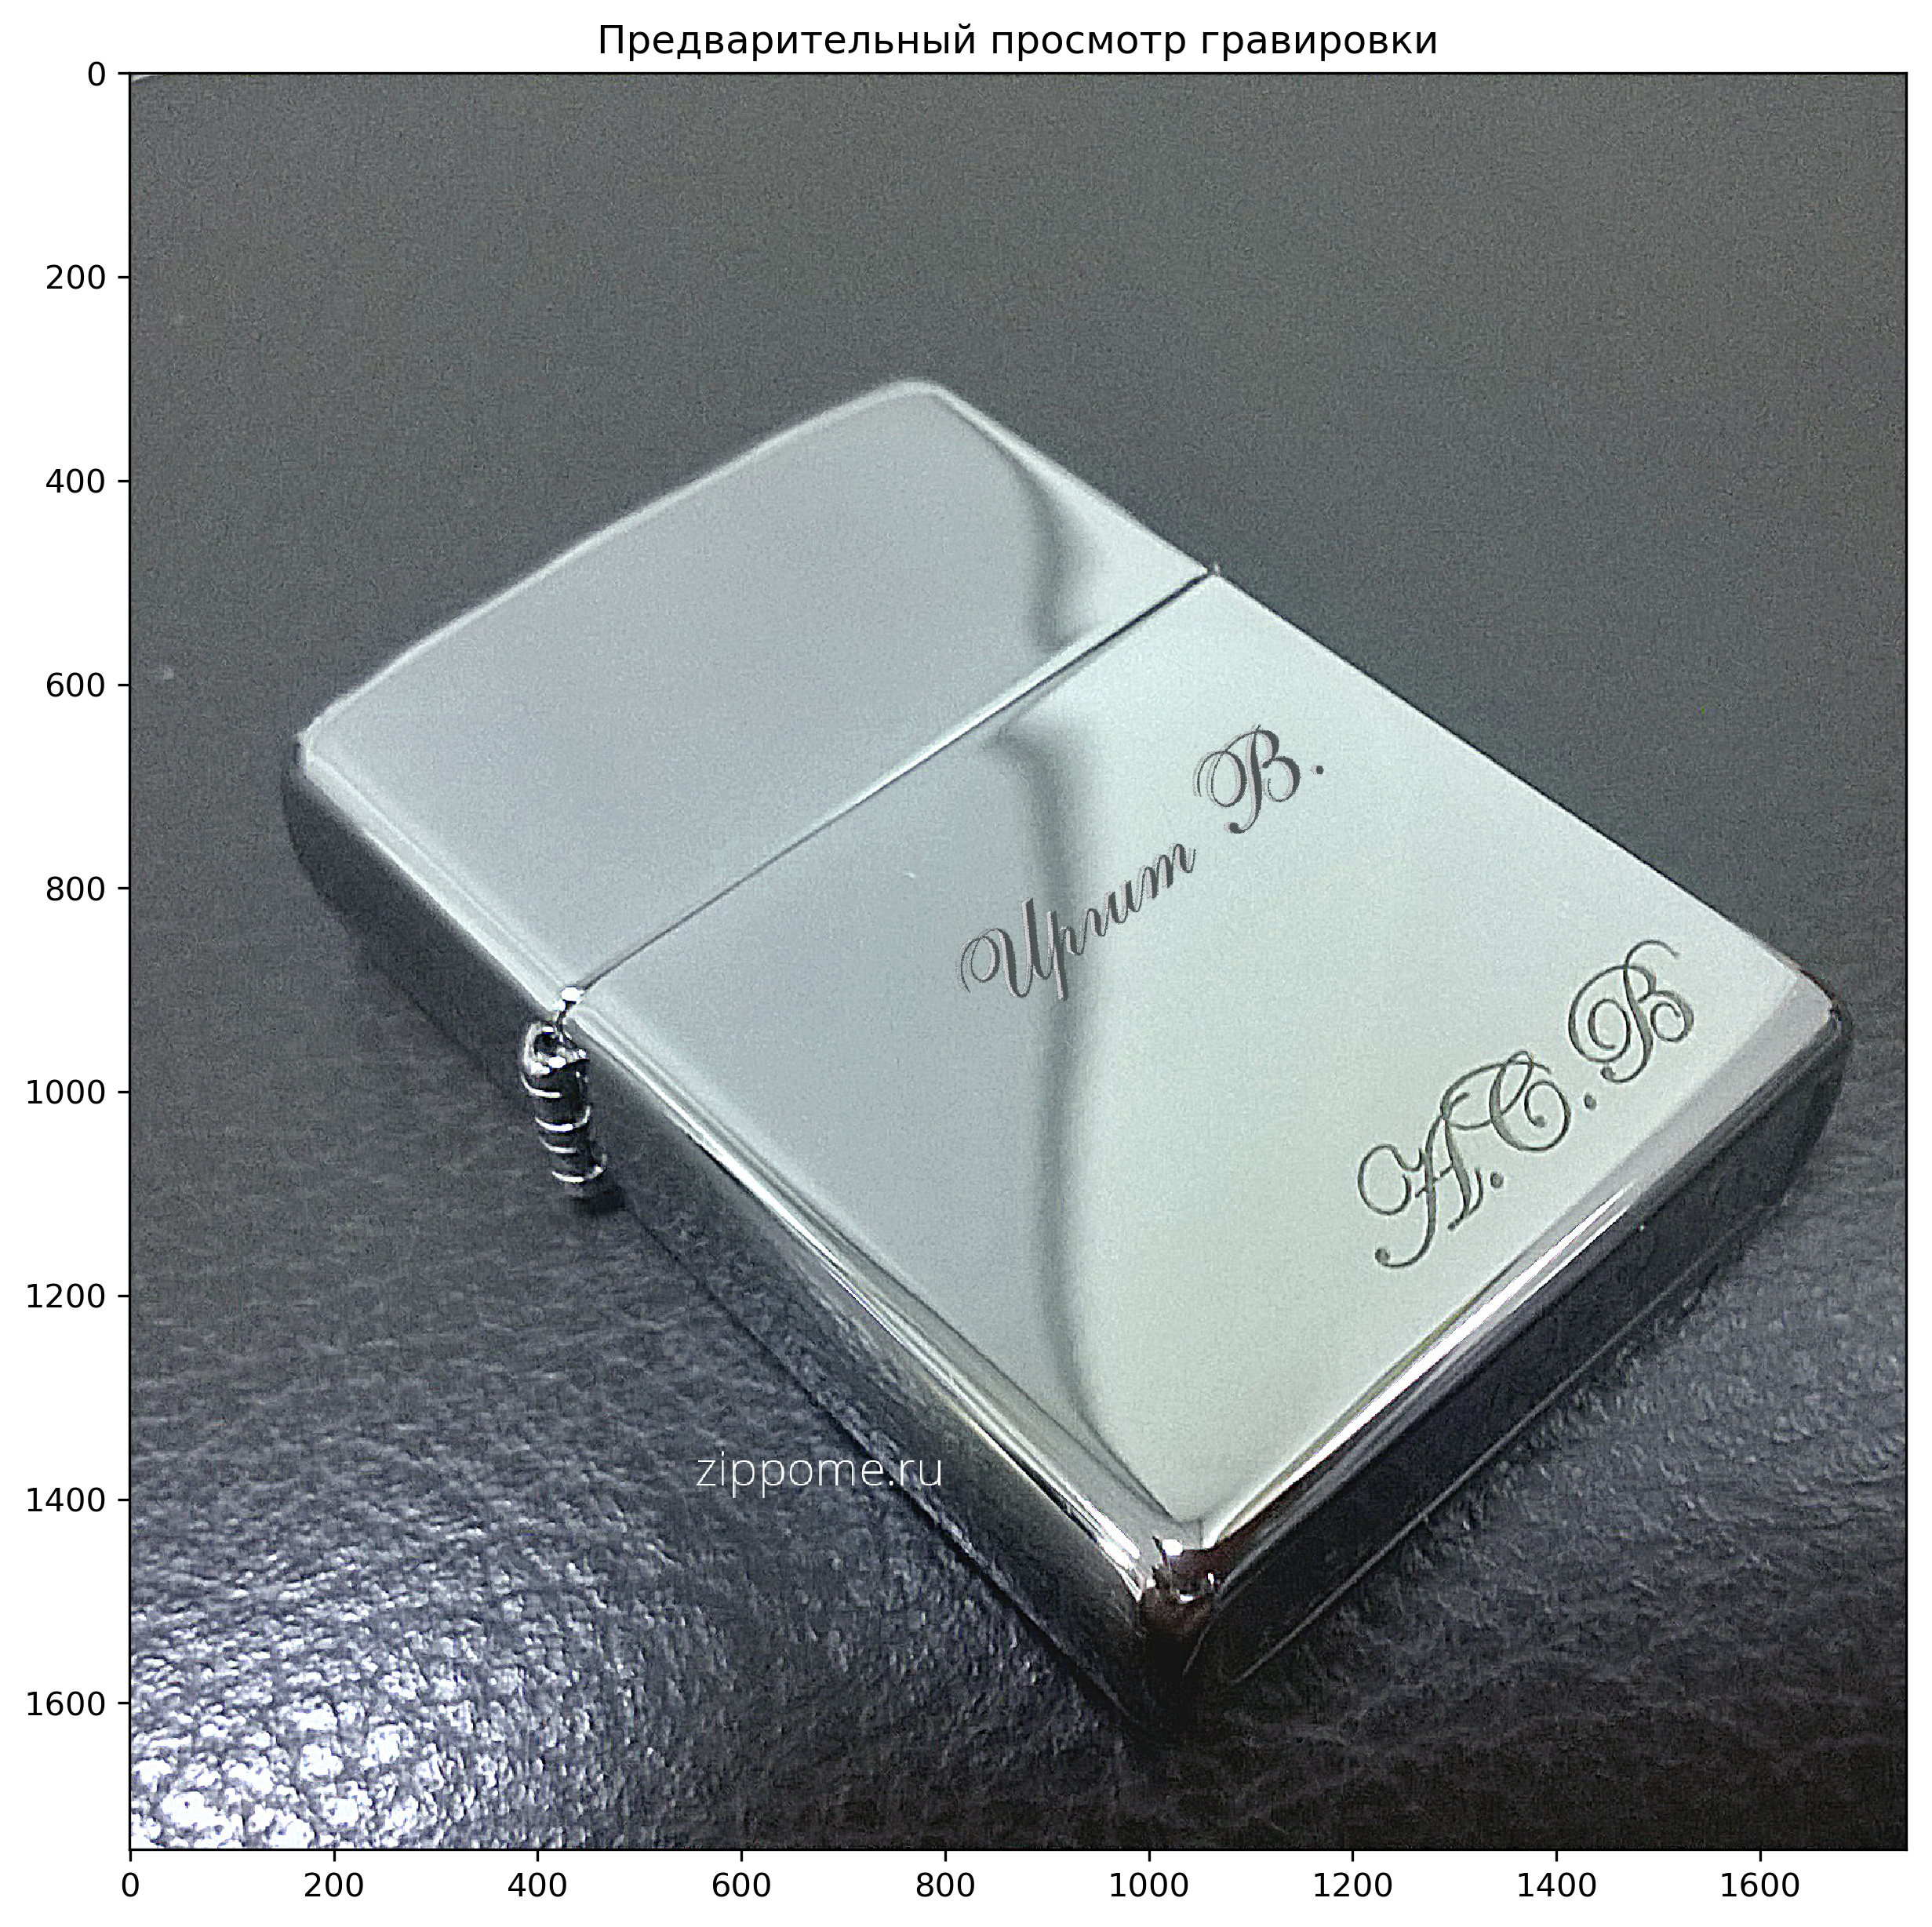

In [144]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.linalg.solve(A, B)
    return np.array(res).reshape(8)

main_point = 500
coeffs = find_coeffs(
        [(0, -20), (500, -2), (500, 100), (0, 500)],
        [(0, 0), (500, 0), (500, 100), (0, 520)])

transform_img = img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC).rotate(41)

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.subplot(),plt.imshow(transform_img),plt.title('Предварительный просмотр гравировки')
plt.show()